['0012' '0013' '0014' '0015' '0016']
[3.81 3.43 3.09 2.79 2.52]
[24. 23. 22. 21. 19. 17. 14. 11.  7.  3.]


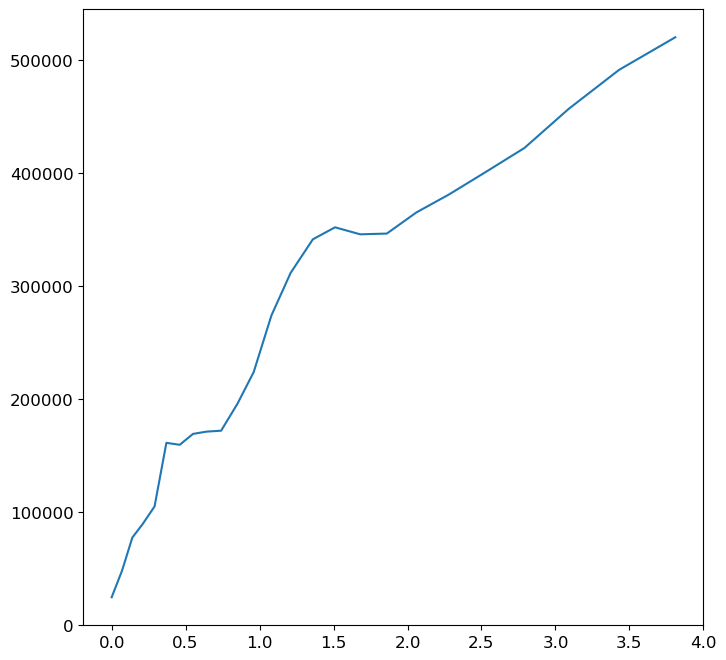

In [1]:
from shared.preface import *
import shared.functions as fct

out_dir = f'L025N752/DMONLY/SigmaConstant00'
nums = np.load(f'{out_dir}/nums_snaps.npy')
zeds = np.load(f'{out_dir}/zeds_snaps.npy')
zint = np.load(f'{out_dir}/z_int_steps.npy')
sint = np.load(f'{out_dir}/s_int_steps.npy')

print(nums[:5])
print(zeds[:5])

idx_arr = np.zeros(len(zint))
for i, s_val in enumerate(sint):
    z = np.interp(s_val, sint, zint)
    idx_arr[i] = np.abs(zeds - z).argmin()
print(idx_arr[::10])

snaps_GRID_L = np.load(f'{out_dir}/snaps_GRID_L.npy')/kpc
snaps_DM_num = np.load(f'{out_dir}/snaps_DM_num.npy')
snaps_DM_com = np.load(f'{out_dir}/snaps_DM_com.npy')/kpc
snaps_QJ_abs = np.load(f'{out_dir}/snaps_QJ_abs.npy')

# plt.plot(zint, np.take(snaps_DM_num, np.asarray(idx_arr, dtype=int))); plt.show()
plt.plot(zeds[::-1], snaps_DM_num); plt.show()

In [6]:
vels_init = np.load('L025N752/DMONLY/SigmaConstant00/initial_velocities.npy')
print(vels_init.shape)
print(vels_init[0]*(kpc/s)/(km/s))

(10000, 3)
[-0.         -0.          1.67521614]


In [18]:
# z_interp = np.interp(sint, sint, zint)
# print(z_interp)
# plt.scatter(zint, z_interp); plt.show()

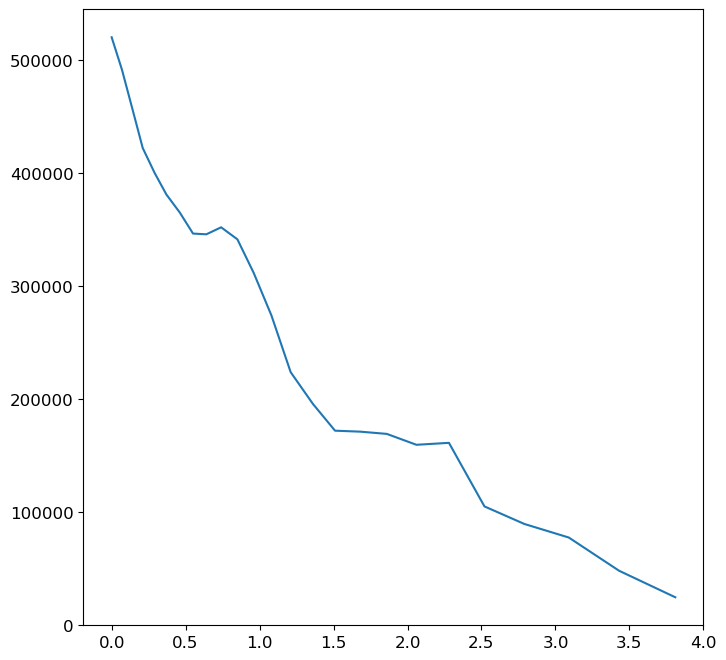

In [8]:
init_dis = 8.5
xE = np.cos(np.deg2rad(Pi))*np.sin(np.deg2rad(Pi))*init_dis
yE = np.sin(np.deg2rad(Pi))*np.sin(np.deg2rad(Pi))*init_dis
zE = np.cos(np.deg2rad(Pi))*init_dis
init_xyz = np.array([xE, yE, zE])
print(init_xyz)

[0.46513108 0.02552925 8.48722577]
8.5


In [ ]:
def nu_in_which_cell(x_i, cell_coords, cell_gens, init_GRID_S):

    # x_i.shape = (3,)
    # cell_coords.shape = (cells, 1, 3)
    # cell_gens.shape = (cells,)

    # Center neutrino coords. on each cell center (whole grid).
    x_i = np.repeat(np.expand_dims(x_i, axis=(0,1)), len(cell_coords), axis=0)
    x_i -= cell_coords

    # All cell lengths. Limit for the largest cell is GRID_S/2, not just 
    # GRID_S, therefore the cell_gen+1 !
    cell_lens = np.expand_dims(init_GRID_S/(2**(cell_gens+1)), axis=1)
    # cell_lens.shape = (cells, 1)

    # Find index of cell in which neutrino is enclosed.
    in_cell = np.asarray(
        (np.abs(x_i[...,0]) < cell_lens) & 
        (np.abs(x_i[...,1]) < cell_lens) & 
        (np.abs(x_i[...,2]) < cell_lens)
    )
    cell_idx = np.argwhere(in_cell==True)

    return cell_idx


